# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)

Train dataset contains:
 - Images, classified as "day" or "night";
 - It's possible to access first pair "image-label" by index 0 - IMAGE_LIST[0]
 - To access label of first image, e.g. - IMAGE_LIST[0][0]. 

---
# 1. Visualize the input images


Firstly, lets select an image and its label and print the shape of it.

In [20]:
# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

## TODO: Print out 1. The shape of the image and 2. The image's label `selected_label`
print(len(selected_image))
print(selected_label)

## TODO: Display a night image
# Note the differences between the day and night images
# Any measurable differences can be used to classify these images

372
day


In [19]:
len(IMAGE_LIST[0][0])

372

Now, let's display day and night images and check the difference between them.

Text(0.5,1,'day')

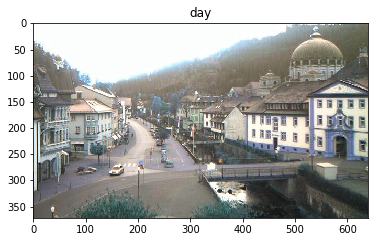

In [29]:
# start with day image
# convert it to RGB format 

selected_copy = np.copy(IMAGE_LIST[image_index][0])
selected_copy = cv2.cvtColor(selected_copy, cv2.COLOR_BGR2RGB)
plt.imshow(selected_copy, cmap = 'gray')
plt.title(IMAGE_LIST[image_index][1])

Then, we display a night image.

In [40]:
for i,j in enumerate(range(len(IMAGE_LIST))):
    if IMAGE_LIST[i][1] == 'night':
        print((j))

120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239


In [43]:
# Select an image and its label by list index
image_index = 120
night_image = IMAGE_LIST[image_index][0]
night_label = IMAGE_LIST[image_index][1]

## TODO: Print out 1. The shape of the image and 2. The image's label `selected_label`
print(len(night_image))
print(night_label)

591
night


Text(0.5,1,'night')

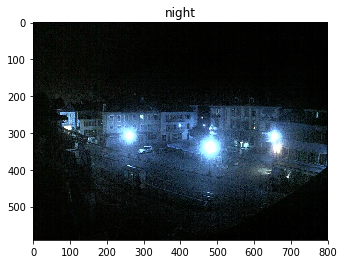

In [45]:
# pursue with night image
# convert it to RGB format 

night_copy = np.copy(IMAGE_LIST[image_index][0])
night_copy = cv2.cvtColor(night_copy, cv2.COLOR_BGR2RGB)
plt.imshow(night_copy, cmap = 'gray')
plt.title(IMAGE_LIST[image_index][1])

### Create a Threshold for images

One possible way to classify the image as knight of day would be to set a threshold for dark pixels.<br>
Next we **apply the same lower and upper bounds for "day" and "knight"** images. We will separate night scene on both images.<br>
Then, set separated "night" background to [0,0,0].<br>
After that we count the number of **non-dark pixels left** for both masks and compare.<br>
We can use both RGB and HSV methods for creating threshold.

In [64]:
lower_dark = np.array([0,0,0])
upper_dark = np.array([40,50,50])

#### Apply mask for day image

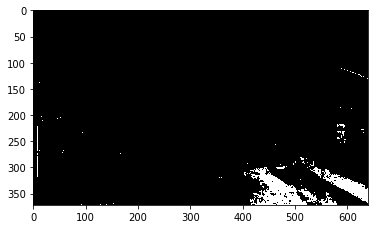

In [67]:
plt.imshow(masked_rgb_day, cmap='gray')

Text(0.5,1,'Masked day image')

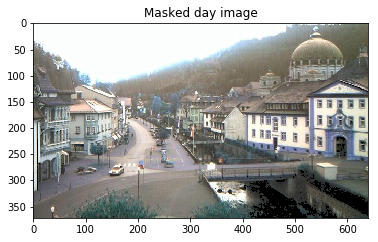

In [68]:
"""
- use inRange() function to create mask
- make a copy of image
- apply mask on the copy 
- all pixels that are not equal to black pixels of mask will be displayed 
"""
masked_rgb_day = cv2.inRange(selected_copy, lower_dark, upper_dark)
masked_img_day = np.copy(selected_copy)
masked_img_day[masked_rgb_day!=0] = [0,0,0]

plt.imshow(masked_img_day)
plt.title('Masked day image')

#### Apply mask for night image

Text(0.5,1,'Masked night image')

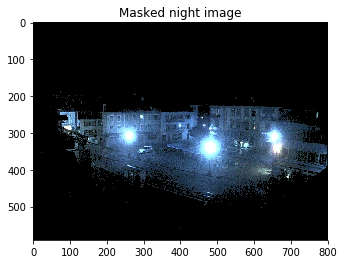

In [95]:
"""
- use inRange() function to create mask
- make a copy of image
- apply mask on the copy 

"""
masked_rgb_night = cv2.inRange(night_copy, lower_dark, upper_dark)
masked_img_night = np.copy(night_copy)
masked_img_night[masked_rgb_night!=0] = [0,0,0]

plt.imshow(masked_img_night)
plt.title('Masked night image')

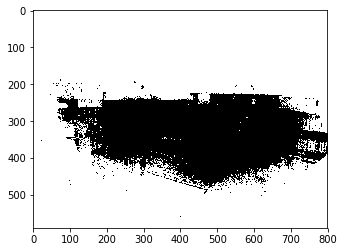

In [96]:
plt.imshow(masked_rgb_night, cmap='gray')

### Count white Pixels for both masks.

Absolute number of white pixels across masks.

In [97]:
day_white = (masked_rgb_day==255)
day_white.sum()

7054

In [98]:
night_white = (masked_rgb_night == 255)
night_white.sum()

349235

Relative number of white pixels across masks.

In [113]:
print(100 * day_white.sum() / (masked_rgb_day.shape[0] * masked_rgb_day.shape[1]))

2.96286962366


In [112]:
print(100 * night_white.sum() / (masked_rgb_night.shape[0] * masked_rgb_night.shape[1]))

73.8652707276
